In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import time

In [3]:
#from tensorflow.keras import models
#from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [4]:
df_input = pd.read_csv("CD3D_100-150℃_0.2-1.6mm_0.4-0.9V_std", usecols=[1,2,3,4,5,6])

In [5]:
df_output = pd. read_csv("CD3D_100-150℃_0.2-1.6mm_0.4-0.9V", usecols=[7])

In [6]:
df_input.shape

(591000, 6)

In [7]:
df_output.shape

(591000, 1)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.1, random_state=0)

In [9]:
print(x_train.shape,x_test.shape)

(531900, 6) (59100, 6)


In [10]:
x_train

,x座標,y座標,z座標,V[V],T_cell[℃],W_ch[mm]
33202,-0.270628,-0.444370,-0.655849,-1.273299,-1.461949,-0.261005
470526,-0.988935,-0.634556,-1.172046,-0.956582,0.874797,1.345807
251619,-1.197745,1.203909,-0.481632,0.627003,-0.293576,-0.261005
23259,-1.327207,0.760141,1.150841,0.310286,-1.461949,-1.064411
530961,-0.696601,0.630181,-0.017055,-1.590016,1.458984,-0.261005
...,...,...,...,...,...,...
359783,-0.245571,-1.193068,-0.631329,1.577154,0.290611,-0.261005
152315,-0.245571,-1.712276,-0.373231,0.627003,-0.877763,-0.261005
117952,-0.224690,1.647676,1.408940,0.627003,-0.877763,-1.064411
435829,0.957174,-0.391752,0.118447,-0.956582,0.874797,-0.261005


In [11]:
y_train

,i[A/m^2]
33202,13249.076174
470526,14707.850425
251619,4351.175516
23259,4281.451239
530961,23260.282649
...,...
359783,839.423396
152315,2944.455891
117952,3336.558641
435829,19685.454044


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers, initializers

model = Sequential()

weights = [com.get_weights() for com in model.layers[0:]]  #重さを抽出（※始めに回すときだけ下の行と入れ替える）



model.add(Dense(units=32, input_shape=(6,), activation='relu'))  
model.add(Dense(units=10, activation='relu'))  #
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='linear'))  #隠れ層3層でやってみる

model.compile(loss='mean_absolute_error',    
              optimizer='adam',             #とりあえずadamで
              metrics=['mae'],
              run_eagerly=False)   #計算時間5倍くらいかかる

In [20]:
start_time = time.time()
callbacks1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_mae',
                            factor=0.2,
                            patience=5,
                            mode="auto",
                            min_lr=0.001) #最初は0.001だった
callbacks2 = tf.keras.callbacks.EarlyStopping(monitor="val_mae",
                                              patience=20, #20→5
                                              mode="auto")
history =  model.fit(x=x_train,
                     y=y_train,
                     epochs = 20000,
                     batch_size=200,
                     validation_data=(x_test, y_test),
                     callbacks=[callbacks1,callbacks2])
end_time = time.time()
elapsed_time = end_time - start_time   #経過時間を計算して表示
print(f"計算にかかった時間: {elapsed_time}秒")

Epoch 1/20000
2660/2660 [==============================] - 8s 3ms/step - loss: 5535.0669 - mae: 5535.0669 - val_loss: 5489.4946 - val_mae: 5489.4946 - lr: 1.0000e-05
Epoch 2/20000
2660/2660 [==============================] - 7s 3ms/step - loss: 5535.0718 - mae: 5535.0718 - val_loss: 5489.4946 - val_mae: 5489.4946 - lr: 1.0000e-05
Epoch 3/20000
2660/2660 [==============================] - 9s 3ms/step - loss: 5535.0757 - mae: 5535.0757 - val_loss: 5489.4946 - val_mae: 5489.4946 - lr: 1.0000e-05
Epoch 4/20000
2660/2660 [==============================] - 9s 3ms/step - loss: 5535.0781 - mae: 5535.0781 - val_loss: 5489.4927 - val_mae: 5489.4927 - lr: 1.0000e-05
Epoch 5/20000
2660/2660 [==============================] - 9s 3ms/step - loss: 5535.0811 - mae: 5535.0806 - val_loss: 5489.4946 - val_mae: 5489.4946 - lr: 1.0000e-05
Epoch 6/20000
2660/2660 [==============================] - 9s 3ms/step - loss: 5535.0757 - mae: 5535.0757 - val_loss: 5489.4946 - val_mae: 5489.4946 - lr: 1.0000e-05
Epoc

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'lr'])

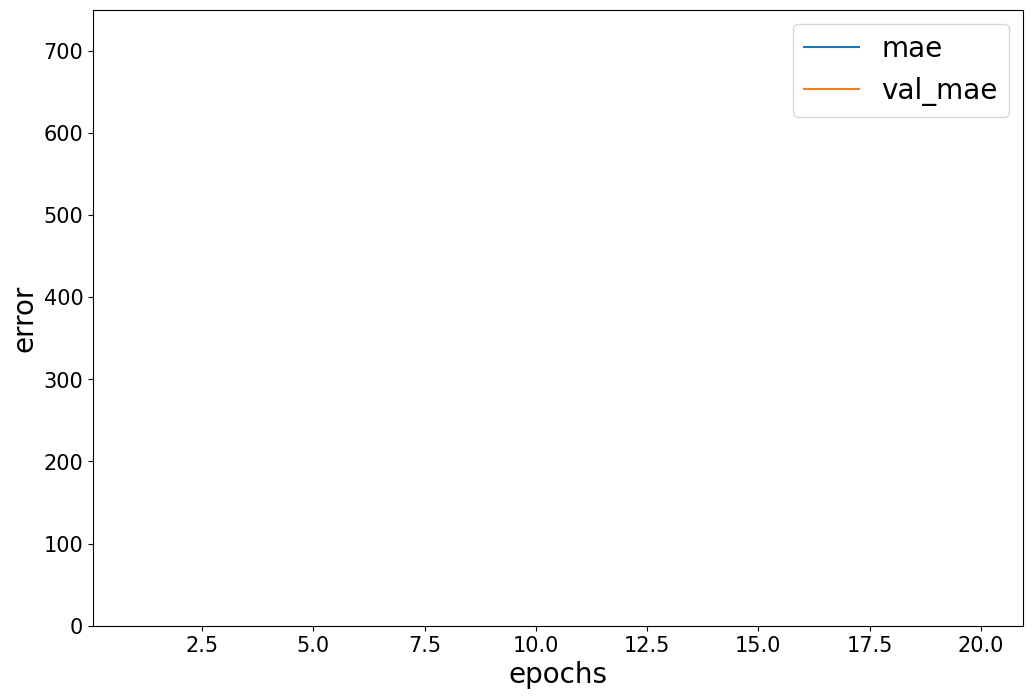

In [15]:
mae = history_dict['mae']
val_mse = history_dict['val_mae']
epochs = range(1, len(mae) + 1)

plt.rcParams["font.size"] = 15
plt.figure(figsize=(12, 8))
plt.plot(epochs, mae, label='mae')
plt.plot(epochs, val_mse, label='val_mae')
plt.xlabel("epochs",fontsize=20)
plt.ylabel("error",fontsize=20)
plt.ylim((0,750))
plt.legend(loc = 'best',fontsize=20)
#plt.savefig('mae_transition.png')
plt.show()

In [16]:
weights = [com.get_weights() for com in model.layers[0:]] 
model.layers[0].set_weights(weights[0])
model.layers[1].set_weights(weights[1])
model.layers[2].set_weights(weights[2])

In [18]:
model.save('i_predict CD_3Ddist-3000')

INFO:tensorflow:Assets written to: i_predict CD_3Ddist-3000\assets
